In [1]:
import os
from glob import glob

import dask.dataframe as dd
import pandas as pd
from dask import delayed, compute

In [2]:
# Uncomment the following lines if you want to use the distributed scheduler
# from dask.distributed import Client
# client = Client()

In [3]:
payroll_glob = "../data/payroll-small/*.csv"

__Exercise__ 

Incrementally calculate the mean `base_salary` of all CSVs in `data/payroll-small/` using `pandas`. Time the entire computation using `%%time` as the first line of the cell.

Do not use any Dask functions.

In [4]:
!ls ../data/payroll-small/

payroll_2017.csv payroll_2018.csv payroll_2019.csv


In [5]:
%%time

sums, ns = [], []
for f in glob(payroll_glob):
    df = pd.read_csv(f)
    s = df.base_salary.sum()
    n = len(df.index)
    sums.append(s)
    ns.append(n)
    
sum(sums) / sum(ns)

CPU times: user 121 ms, sys: 25 ms, total: 146 ms
Wall time: 150 ms


44387.192021095216

__Exercise__

Load all the payroll CSVs using `dd.read_csv` and assign it to `payroll`. Calculate the number of partitions in the DataFrame.

In [6]:
payroll = dd.read_csv(payroll_glob)

In [7]:
payroll.npartitions

3

__Exercise__

Calculate the mean of the `payroll.base_salary` Dask DataFrame. How do the timings compare for the Dask and Pandas versions.

In [8]:
%time payroll.base_salary.mean().compute()

CPU times: user 165 ms, sys: 52.9 ms, total: 218 ms
Wall time: 134 ms


44387.192021095216

__Exercise__ 

Print out the task graph for the mean calculation from the previous exercise using `visualize`. Set `rankdir="LR"` to display the graph left-to-right.

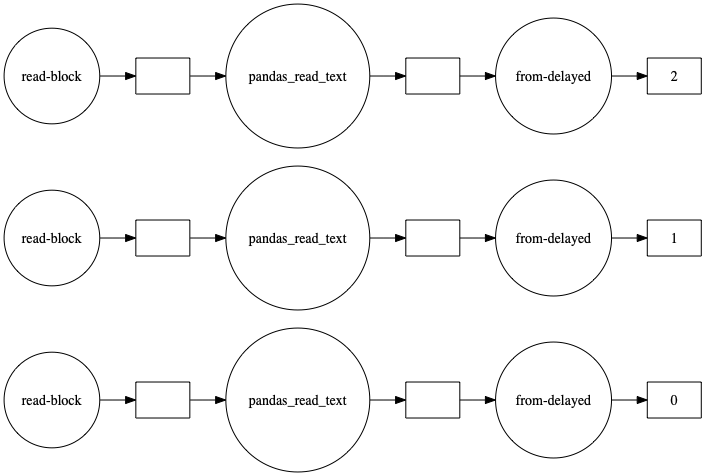

In [9]:
payroll.visualize(rankdir="LR")

__Exercise__ 

Add a `max` calculation on `ot_hours` to the Dask graph but do not call `compute`. Why does the graph overlap with the previous one we visualize?

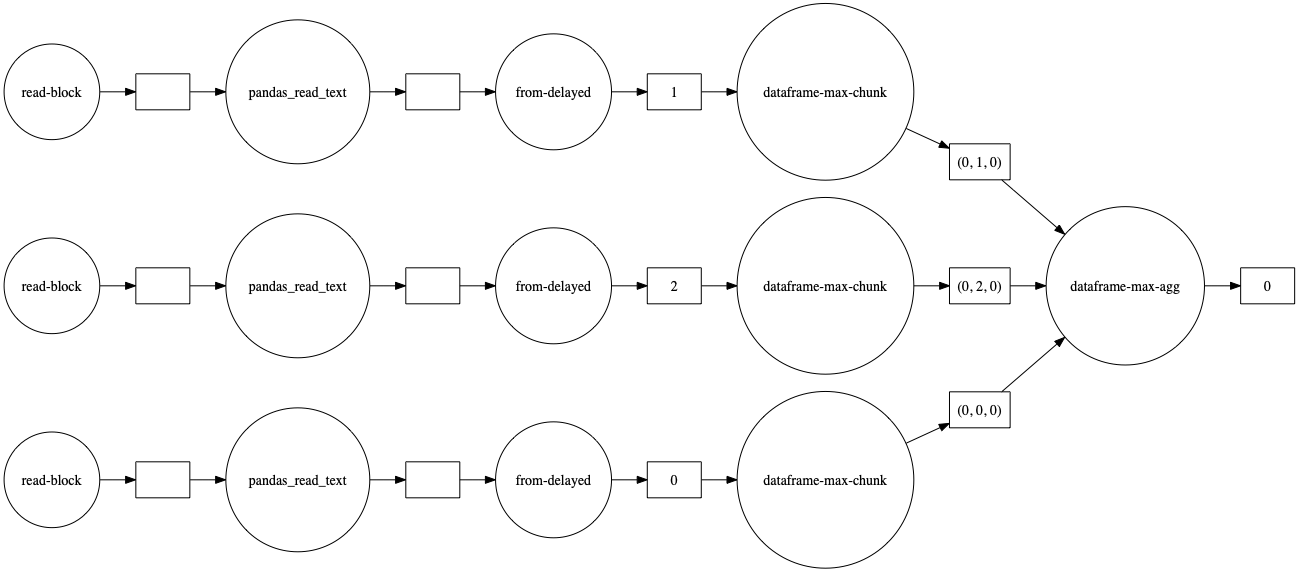

In [10]:
payroll.max().visualize(rankdir="LR")

__Exercise__ 

Call `persist` on `payroll` and visualize the result. Why is the new graph different from the previous one?

In [11]:
payroll = payroll.persist()

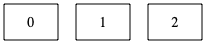

In [12]:
payroll.visualize()